In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
festivales_bcn_15 = pd.read_pickle("./data/festivales_bcn_15_procesado.pkl")

In [134]:
categoricas_festivales = [
    "Ambit",
    "Titularidad",
    "NomDelFestival",
    "Mes",
    "Estacion",
    "Entrada"
]

In [135]:
categoricas_destacadas = [
    'Ambit', 
    'Titularidad', 
    'Mes', 
    'Estacion',
    "Entrada"
]

In [136]:
columnas_numericas_fests = [
    "Edicio",
    "Asistentes"
]

Funciones análisis

In [137]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    # Filtra solo las columnas que están en categoricas_destacadas
    columnas_categoricas = [col for col in columnas_categoricas if col in categoricas_destacadas]
    
    num_columnas = 2 
    num_filas = (len(columnas_categoricas) + num_columnas - 1) // num_columnas  # Calcula el número de filas necesario

    fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 5 * num_filas))  # Ajusta el tamaño del subplot
    axes = axes.flatten()  # Aplanar el array de axes para un manejo más fácil

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if isinstance(df[col].iloc[0], list):  # Verificar si el elemento es una lista
            temp_df = df.explode(col)
        else:
            temp_df = df

        serie = temp_df[col].value_counts()
        if relativa:
            total = serie.sum()
            serie = serie.apply(lambda x: x / total)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            ax.set_ylabel('Frecuencia')

        # Usar la paleta 'viridis' y asignar 'x' a 'hue'
        sns.barplot(x=serie.index, y=serie, hue=serie.index, ax=ax, palette='viridis', legend=False)
        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')  # Ocultar ejes no utilizados

    plt.tight_layout()
    plt.show()

In [138]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [139]:
def plot_boxplot_grouped(df, column_to_plot, group_column):
    if df[column_to_plot].dtype in ['int64', 'float64'] and df[group_column].dtype in ['object', 'category']:
        sns.boxplot(data=df, x=group_column, y=column_to_plot)
        plt.show()

In [140]:
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

In [141]:
def variabilidad(df):
    df_var = df.describe().loc[["std", "mean"]].T
    df_var["CV"] = df_var["std"]/ df_var["mean"]
    return df_var

In [142]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [143]:
def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

Tendencia central

In [144]:
festivales_bcn_15.describe().loc["mean"]

Edicio           13.74
Asistentes    34647.36
Name: mean, dtype: float64

In [145]:
festivales_bcn_15.describe().loc["50%"]

Edicio           13.0
Asistentes    10508.5
Name: 50%, dtype: float64

In [146]:
festivales_bcn_15.describe().loc["max"]

Edicio            47.0
Asistentes    484805.0
Name: max, dtype: float64

In [147]:
festivales_bcn_15.describe().loc["min"]

Edicio          1.0
Asistentes    800.0
Name: min, dtype: float64

In [148]:
festivales_bcn_15[categoricas_destacadas].mode().T

,0,1,2
Ambit,Música,NaN,NaN
Titularidad,Privada,NaN,NaN
Mes,Junio,NaN,NaN
Estacion,Otoño,Primavera,Verano
Entrada,De Pago,NaN,NaN


Comentarios <br>
Com una mediana de unos 10.500 asistentes de mediana, el festival tipo de Barcelona es de música y con entrada pagada, y mayor concentración de oferta en junio, aunque la distribución a lo largo del año es bastante equilibrada con la misma cantidad en primavera, verano y otoño.

Frecuencias relativa y absoluta

In [149]:
for catego in categoricas_destacadas:
    print(festivales_bcn_15[catego].value_counts())
    print("\n")

Ambit
Música                         20
Audiovisuals                   13
Arts visuals                    5
Multidisciplinaris i altres     5
Arts escèniques                 4
Lletres                         3
Name: count, dtype: int64


Titularidad
Privada    41
Pública     7
Mixta       2
Name: count, dtype: int64


Mes
Junio         8
Octubre       7
Julio         7
Septiembre    5
Noviembre     5
Mayo          4
Enero         3
Marzo         3
Abril         3
Febrero       2
Agosto        2
Diciembre     1
Name: count, dtype: int64


Estacion
Otoño        14
Verano       14
Primavera    14
Invierno      8
Name: count, dtype: int64


Entrada
De Pago    37
Gratis      9
Mixta       4
Name: count, dtype: int64




In [151]:
for catego in categoricas_destacadas:
    print(festivales_bcn_15[catego].value_counts()/len(festivales_bcn_15)*100)
    print("\n")

Ambit
Música                         40.0
Audiovisuals                   26.0
Arts visuals                   10.0
Multidisciplinaris i altres    10.0
Arts escèniques                 8.0
Lletres                         6.0
Name: count, dtype: float64


Titularidad
Privada    82.0
Pública    14.0
Mixta       4.0
Name: count, dtype: float64


Mes
Junio         16.0
Octubre       14.0
Julio         14.0
Septiembre    10.0
Noviembre     10.0
Mayo           8.0
Enero          6.0
Marzo          6.0
Abril          6.0
Febrero        4.0
Agosto         4.0
Diciembre      2.0
Name: count, dtype: float64


Estacion
Otoño        28.0
Verano       28.0
Primavera    28.0
Invierno     16.0
Name: count, dtype: float64


Entrada
De Pago    74.0
Gratis     18.0
Mixta       8.0
Name: count, dtype: float64




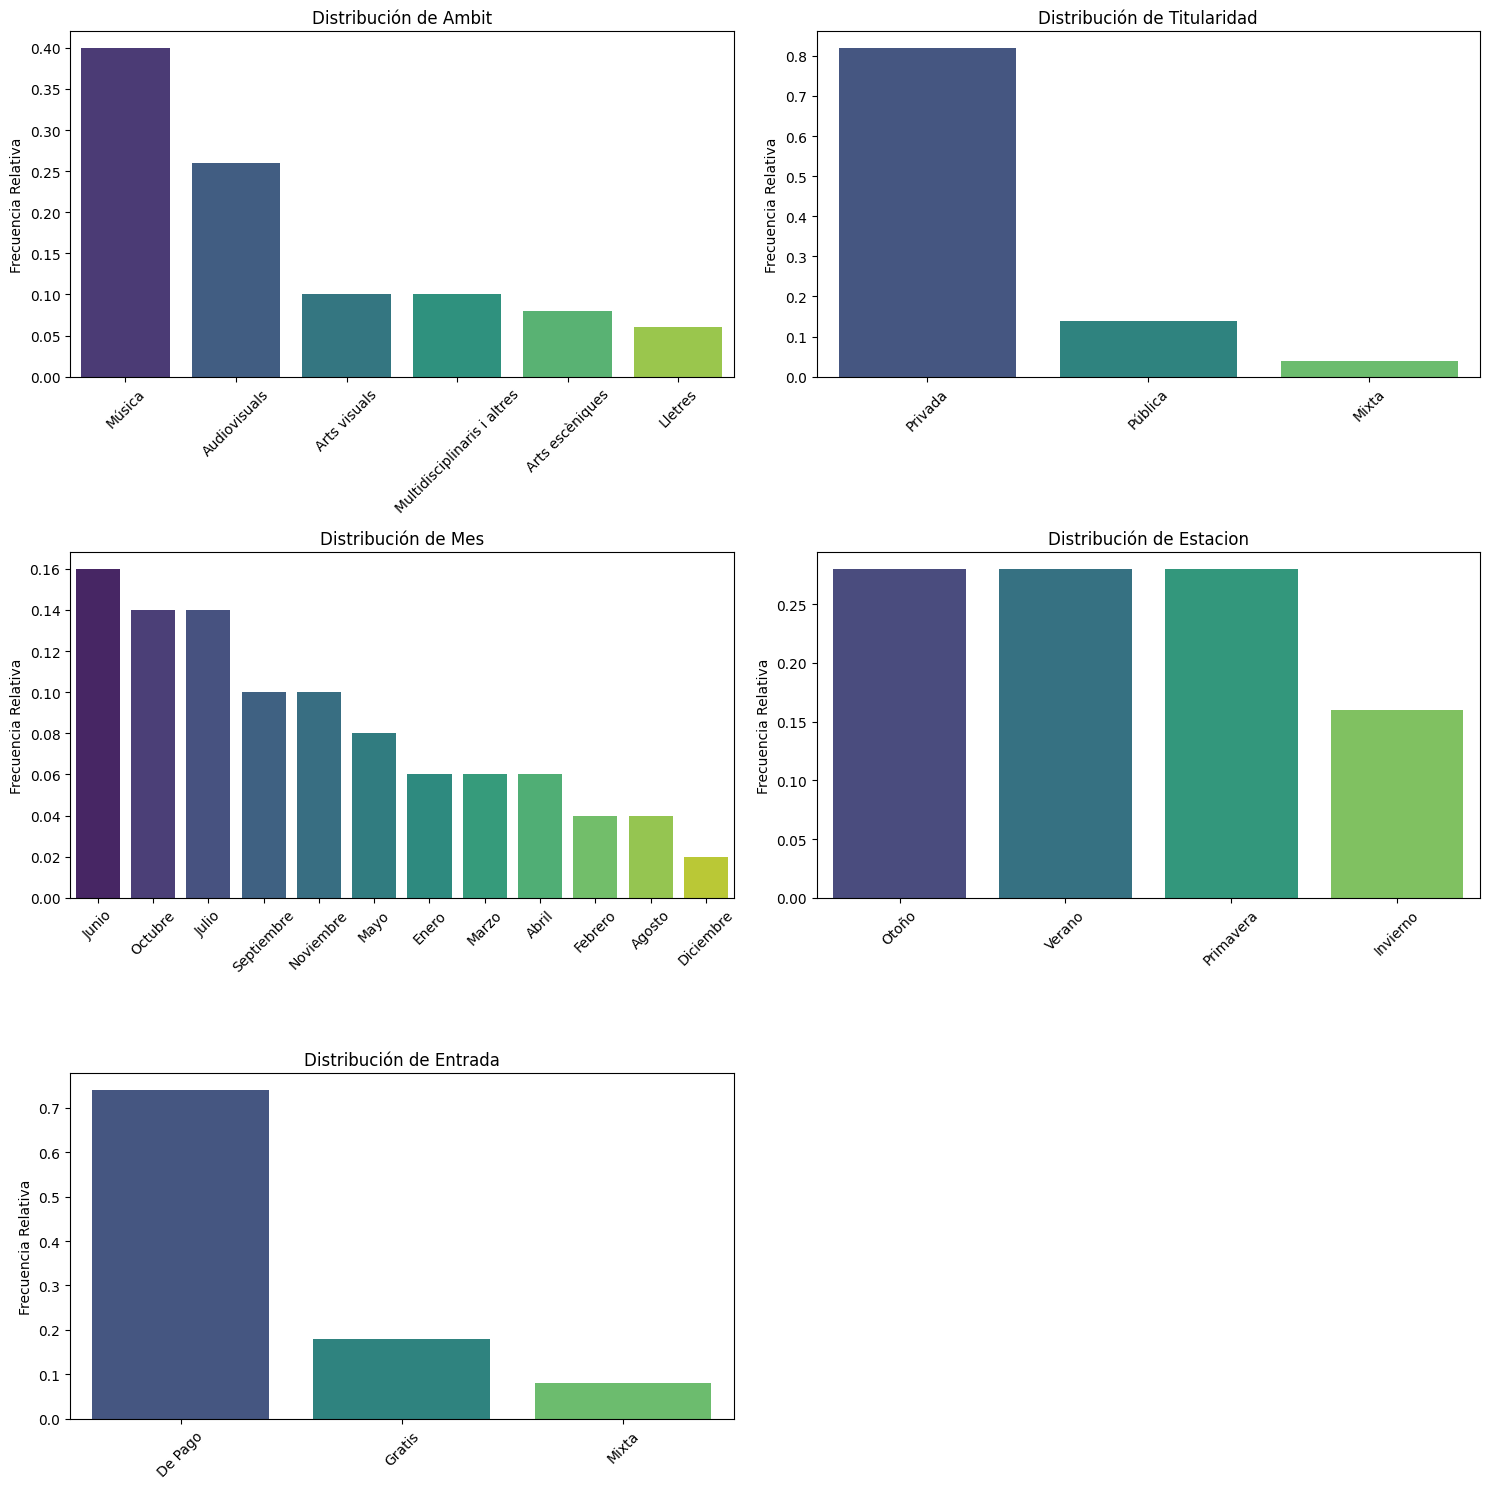

In [166]:
pinta_distribucion_categoricas(festivales_bcn_15, categoricas_destacadas, relativa = True)

Comentarios <br>
El número de propuestas del sector privado casi cuadriplica las del sector público, y proporción de festivales gratuitos vs. de pago es cercana al triple.<br>
Hay festivales programados todos los meses, aunque con predominio muy marcado de junio. Cae diciembre y no se recupera al nivel anterior hasta pasada la pandemia. Y hay empate técnico entre primavera, otoño e invierno<br>
La música es sin duda la protagonista de los festivales, seguida de lejos por los audivisuales, y mucho más lejos pero en proporciones similares, tanto escénicas como visuales y multidisiplinares y hasta letras, todas a la par. <br>
Estas conclusiones parecen repetirse en la mayoría de los años, excepto en la pandemia y justo después

Medidas de posición

In [152]:
festivales_bcn_15.describe()

,Edicio,Asistentes
count,50.000000,50.000000
mean,13.740000,34647.360000
std,9.774624,74729.081862
min,1.000000,800.000000
25%,5.250000,6859.000000
50%,13.000000,10508.500000
75%,20.000000,30627.000000
max,47.000000,484805.000000


In [153]:
get_IQR(festivales_bcn_15,"Edicio") 
# No es tanto mayor que la mediana (11), y casi igual que la media (mean)

14.75

In [154]:
print(festivales_bcn_15["Edicio"].quantile(0.5), "\n",
    festivales_bcn_15["Edicio"].quantile(0.9), "\n",
    festivales_bcn_15["Edicio"].quantile(0.95), "\n",
    festivales_bcn_15["Edicio"].max())

13.0 
 25.1 
 27.099999999999994 
 47.0


In [155]:
get_IQR(festivales_bcn_15,"Asistentes") 
# Sí es mucho mayor que la mediana(2120). Hay mucha dispersión. Hay que tomar con cuidado la tendencia central

23768.0

In [156]:
print(festivales_bcn_15["Asistentes"].quantile(0.5), "\n",
    festivales_bcn_15["Asistentes"].quantile(0.9), "\n",
    festivales_bcn_15["Asistentes"].quantile(0.95), "\n",
    festivales_bcn_15["Asistentes"].max())

10508.5 
 77930.60000000002 
 127562.84999999995 
 484805.0


Comentarios: <br>
Alta dispersión en el número de asistentes. La mediana está en 10.500, unas 7 veces menos que el primer 90%, cercano a los 80 mil, que da un salto interesante hasta los 127 mil, (90 y 95% vienen bajando resecto a años anteriores) y que luego del 95 salta de forma bestial, más del triple, hasta los 480 mil. No solo Esta máxima es unas 19 veces la mediana, sino que es el pico más alto de la década, a excepción del año de la pandemia. Este salto no responde a un crecimiento sostenido sino que es abrupto.

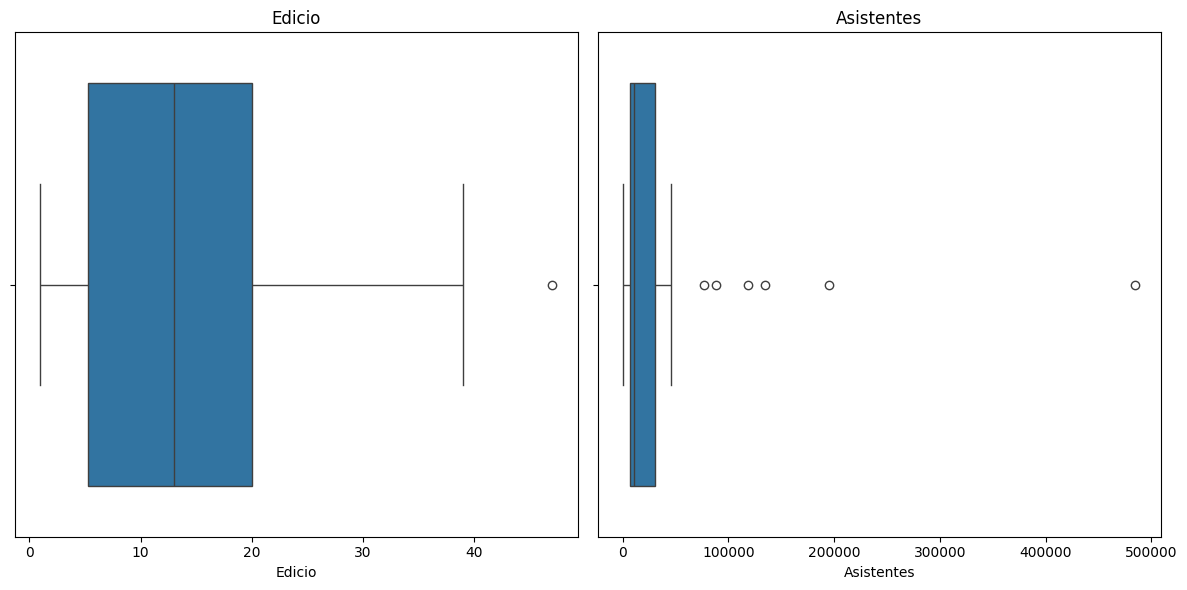

In [157]:
plot_multiple_boxplots(festivales_bcn_15, columnas_numericas_fests)

Comentarios: <br>
Gracias a los boxplots podemos observar como no hay una media centrada, y además hay bastantes outliers en las cifras de asistentes, algunos muy distantes del resto

In [158]:
plot_boxplot_grouped(festivales_bcn_15, "Edicio", "Asistentes")

# Por qué no consigo que se imprima esto????

Medidas de dispersión

In [159]:
festivales_bcn_15.describe().loc[["std", "mean"]].T

,std,mean
Edicio,9.774624,13.74
Asistentes,74729.081862,34647.36


In [160]:
variabilidad(festivales_bcn_15)
# Menos 15% es baja variabilidad, entre 15 y 30 es normal, más de 30 es alta = Es decir, todos tienen una altísima variabilidad! A ver visualmente...

,std,mean,CV
Edicio,9.774624,13.74,0.711399
Asistentes,74729.081862,34647.36,2.156848


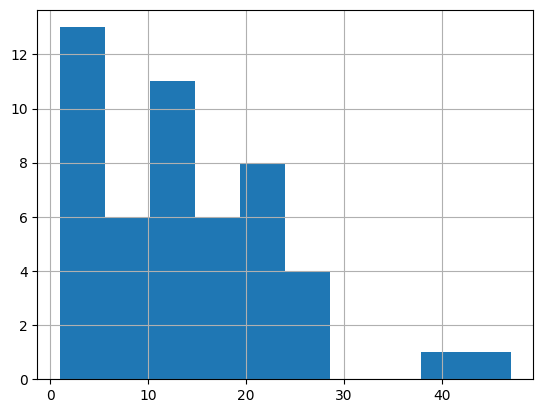

In [161]:
festivales_bcn_15["Edicio"].hist();

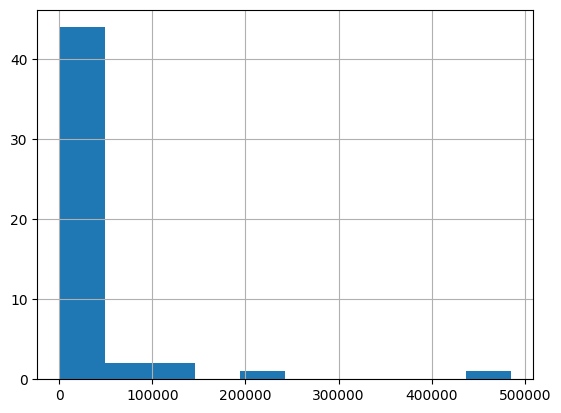

In [162]:
festivales_bcn_15["Asistentes"].hist();

Distribución

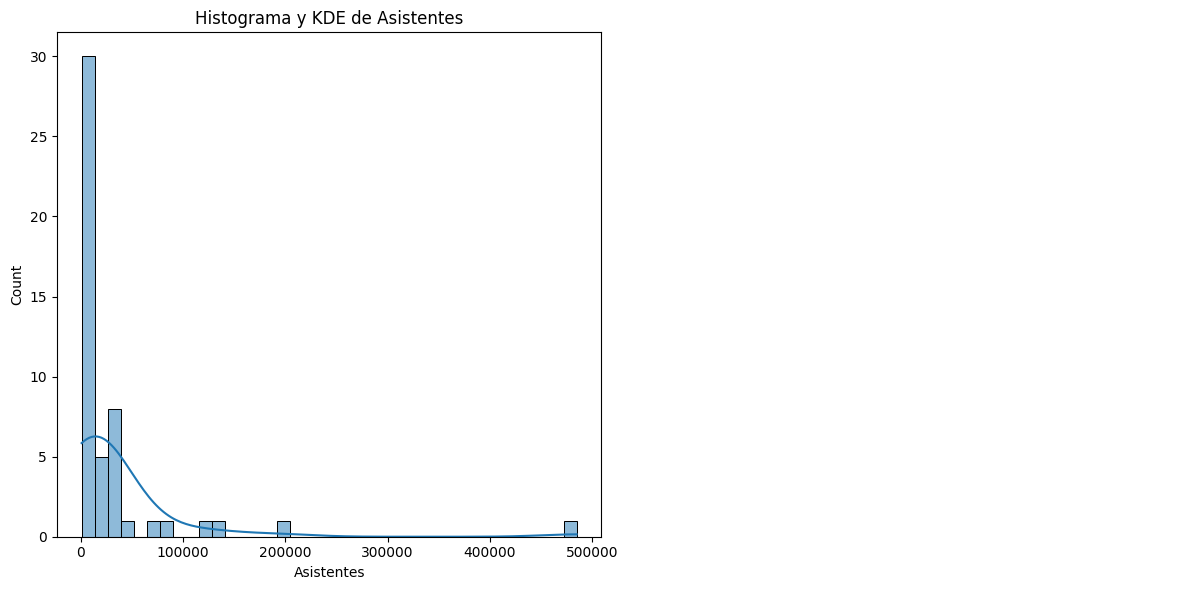

In [163]:
plot_histo_den(festivales_bcn_15, ["Asistentes"])

Anomalías outliers

(2,)


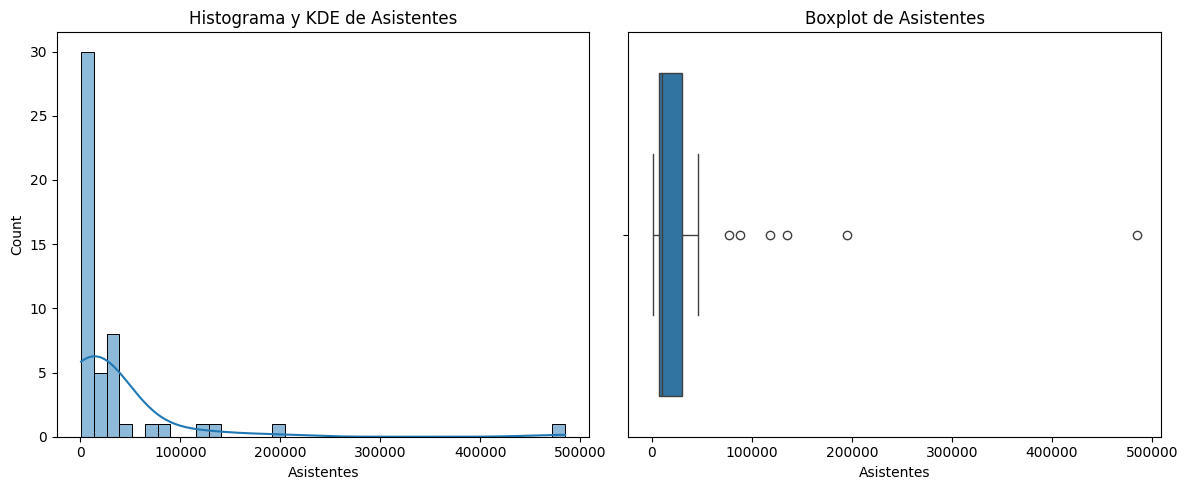

In [164]:
plot_combined_graphs(festivales_bcn_15, ["Asistentes"])

In [165]:
festivales_bcn_15

,Ambit,Edicio,NomDelFestival,Titularidad,Mes,Estacion,Asistentes,Entrada
1,Audiovisuals,2.0,Americana Film Fest,Privada,Febrero,Invierno,5050.0,De Pago
2,Arts visuals,2.0,Art Photo BCN,Privada,Octubre,Otoño,800.0,De Pago
3,Música,3.0,Bachcelona,Privada,Julio,Verano,8000.0,De Pago
4,Música,23.0,BAM. Barcelona Acció Musical,Pública,Septiembre,Verano,76750.0,Gratis
5,Arts visuals,10.0,Barcelona Design Week City Festival,Privada,Junio,Primavera,11848.0,Gratis
6,Arts visuals,6.0,Barcelona Dibuixa,Pública,Octubre,Otoño,13000.0,Gratis
7,Lletres,18.0,Barcelona Poesia,Pública,Mayo,Primavera,4436.0,Gratis
8,Música,20.0,BarnaSants,Privada,Enero,Invierno,7886.0,De Pago
9,Multidisciplinaris i altres,2.0,Brunch Electronik,Privada,Marzo,Invierno,35000.0,De Pago
10,Multidisciplinaris i altres,3.0,Brunch Electronik,Privada,Octubre,Otoño,10000.0,De Pago
